In [1]:
from models.UNet import *

import matplotlib.pyplot as plt
import numpy as np
import os
import time

# Load Data

In [3]:
x_train = np.load('./dataset/x_train.npy')
y_train = np.load('./dataset/y_train.npy')
x_test = np.load('./dataset/x_test.npy')
y_test = np.load('./dataset/y_test.npy')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(213, 64, 64, 1) (213, 64, 64, 1)
(54, 64, 64, 1) (54, 64, 64, 1)


# Segmentation Class U-Net

In [4]:
seg_model = UNet(img_shape = x_train[0].shape, num_of_class = 1,learning_rate = 2e-4, do_drop = True, drop_rate = 0.5)

C:\Users\ATSIGN\anaconda3\envs\py3_TF2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

# Train Model

In [6]:
history = seg_model.train(x_train, y_train, epoch = 100, batch_size = 64)

Epoch 1/100
3/3 [==============================] - 51s 16s/step - loss: 0.7056 - dice_coef: 0.3199 - val_loss: 0.5991 - val_dice_coef: 0.2547
Epoch 2/100
3/3 [==============================] - 49s 16s/step - loss: 0.5909 - dice_coef: 0.2483 - val_loss: 0.5682 - val_dice_coef: 0.2363
Epoch 3/100
3/3 [==============================] - 49s 16s/step - loss: 0.5519 - dice_coef: 0.2541 - val_loss: 0.4935 - val_dice_coef: 0.2653
Epoch 4/100
3/3 [==============================] - 48s 16s/step - loss: 0.4722 - dice_coef: 0.2966 - val_loss: 0.4069 - val_dice_coef: 0.3551
Epoch 5/100
3/3 [==============================] - 48s 16s/step - loss: 0.3996 - dice_coef: 0.3867 - val_loss: 0.3645 - val_dice_coef: 0.4366
Epoch 6/100
3/3 [==============================] - 48s 16s/step - loss: 0.3504 - dice_coef: 0.4563 - val_loss: 0.3049 - val_dice_coef: 0.5123
Epoch 7/100
3/3 [==============================] - 48s 16s/step - loss: 0.3177 - dice_coef: 0.5340 - val_loss: 0.2826 - val_dice_coef: 0.5490
Epoch 

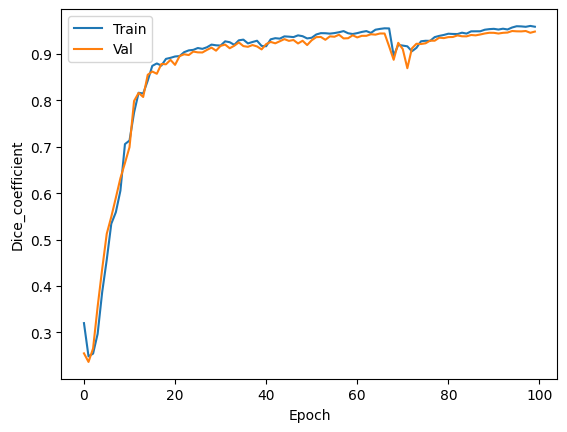

In [7]:
plot_dice(history)

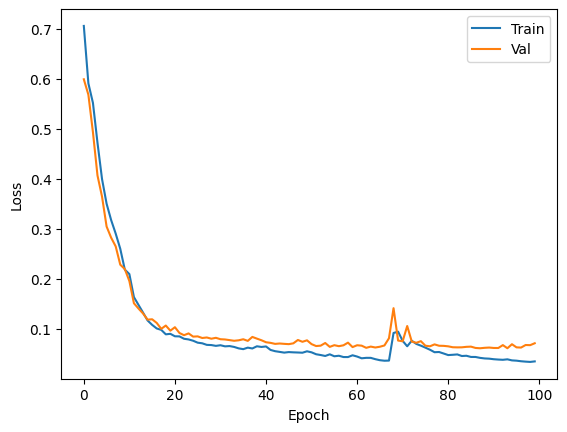

In [8]:
plot_loss(history)

# Show result

In [9]:
preds = seg_model.predict(x_test)

2/2 [==============================] - 5s 1s/step


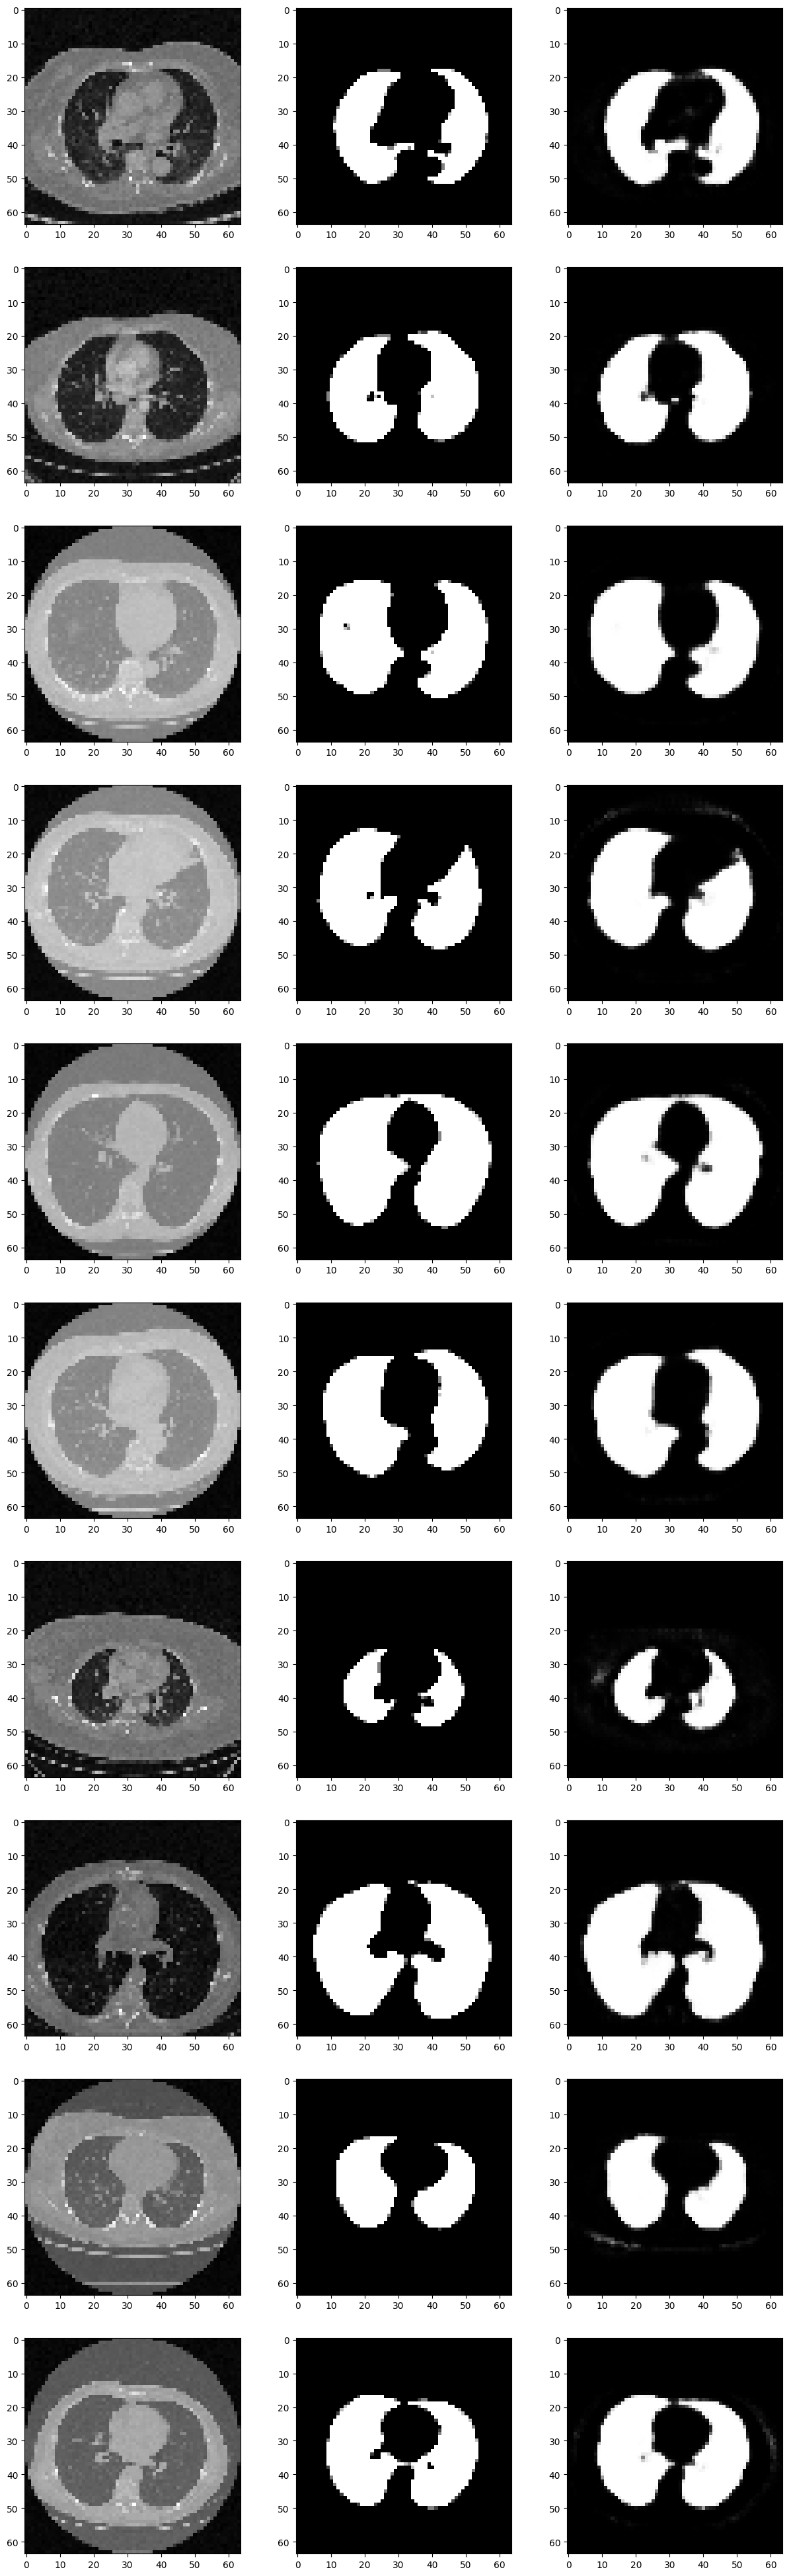

In [10]:
show_num = 10
fig, ax = plt.subplots(show_num, 3, figsize=(15, 50))

for i, pred in enumerate(preds[:show_num]):
    ax[i, 0].imshow(x_test[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_test[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')

In [11]:
seg_model.save_model()

INFO:tensorflow:Assets written to: unet_seg_model/seg_model.model\assets


INFO:tensorflow:Assets written to: unet_seg_model/seg_model.model\assets
